In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [ ]:
start = '2015-01-01'
end = '2025-10-20'
stock = 'GOOG'

data = yf.download(stock, start, end)

C:\Users\kaust\AppData\Local\Temp\ipykernel_8396\2263746971.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock, start, end)
[*********************100%***********************]  1 of 1 completed


In [6]:
data

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2015-01-02,25.990791,26.310719,25.955630,26.198793,28951268
2015-01-05,25.448997,25.967021,25.408884,25.914029,41196796
2015-01-06,24.859161,25.563149,24.814096,25.504957,57998800
2015-01-07,24.816576,25.120852,24.744766,25.108768,41301082
2015-01-08,24.894823,24.934442,24.316380,24.662554,67071641
...,...,...,...,...,...
2025-10-13,244.639999,244.990005,240.750000,241.029999,12465000
2025-10-14,246.190002,248.024994,241.177994,241.755005,17705400


In [7]:
data.reset_index(inplace=True)

In [8]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2015-01-02,25.990791,26.310719,25.955630,26.198793,28951268
1,2015-01-05,25.448997,25.967021,25.408884,25.914029,41196796
2,2015-01-06,24.859161,25.563149,24.814096,25.504957,57998800
3,2015-01-07,24.816576,25.120852,24.744766,25.108768,41301082
4,2015-01-08,24.894823,24.934442,24.316380,24.662554,67071641
...,...,...,...,...,...,...
2710,2025-10-13,244.639999,244.990005,240.750000,241.029999,12465000
2711,2025-10-14,246.190002,248.024994,241.177994,241.755005,17705400
2712,2025-10-15,251.710007,252.759995,246.789993,248.085007,16048100


# Moving Average of 100 days it changes as the day increments represented by ma_100_days

In [10]:
ma_100_days = data.Close.rolling(100).mean()

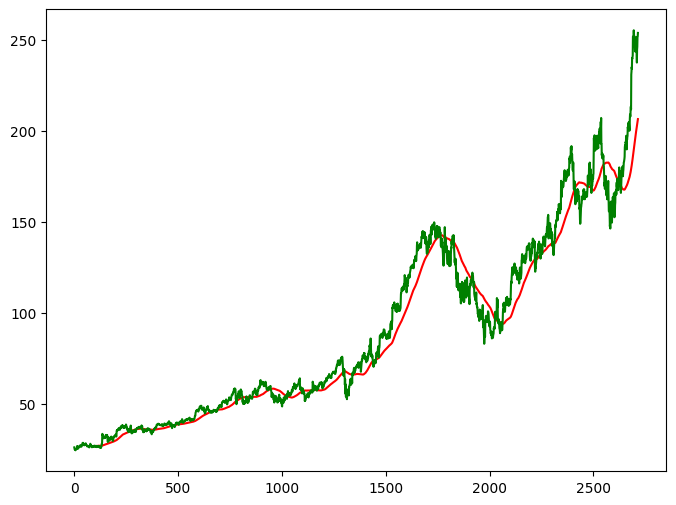

In [11]:
plt.figure(figsize=(8, 6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [15]:
ma_200_days = data.Close.rolling(200).mean()

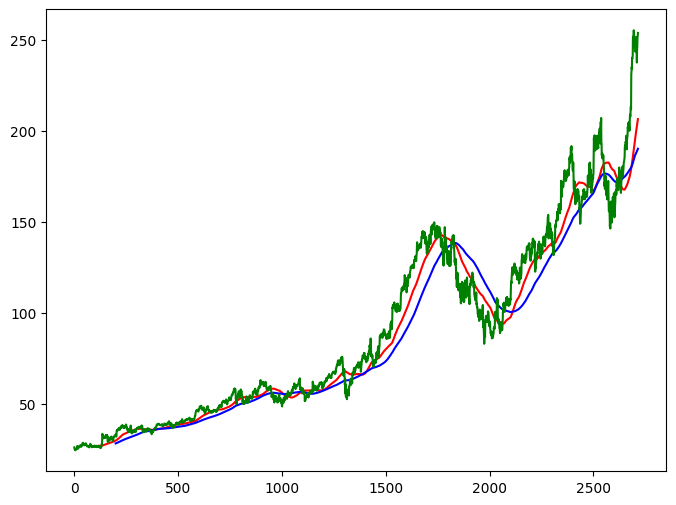

In [16]:
plt.figure(figsize=(8, 6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days, 'b')
plt.plot(data.Close, 'g')
plt.show()

In [17]:
data.dropna(inplace=True)

In [19]:
X_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
X_test = pd.DataFrame(data.Close[int(len(data)*0.80) : len(data)])

In [22]:
X_train.shape, X_test.shape

((2172, 1), (543, 1))

# Normalize the data

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [25]:
X_train_scale = scaler.fit_transform(X_train)

In [26]:
x = []
y = []

for i in range(100, X_train_scale.shape[0]):
    x.append(X_train_scale[i-100: i])
    y.append(X_train_scale[i, 0])

In [35]:
x, y = np.array(x), np.array(y)

In [34]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

Sequential accepts 10 layers

In [44]:
model = Sequential()
model.add(LSTM(50, activation='tanh', return_sequences=True, input_shape=((x.shape[1], 1))))
model.add(Dropout(0.2))
model.add(LSTM(60, activation='tanh', return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(80, activation='tanh', return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(120, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(1))

model.compile(
    optimizer='adam', loss='mean_squared_error', metrics=['mae']
)


c:\Users\kaust\Desktop\Stock\myenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [45]:
model.fit(x, y, epochs=50, batch_size=32, verbose=1 )

Epoch 1/50


65/65 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step - loss: 0.0202 - mae: 0.0905
Epoch 2/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 7s 105ms/step - loss: 0.0052 - mae: 0.0482
Epoch 3/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 7s 105ms/step - loss: 0.0051 - mae: 0.0483
Epoch 4/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 7s 106ms/step - loss: 0.0044 - mae: 0.0447
Epoch 5/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 7s 102ms/step - loss: 0.0038 - mae: 0.0415
Epoch 6/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 7s 102ms/step - loss: 0.0043 - mae: 0.0433
Epoch 7/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 7s 106ms/step - loss: 0.0037 - mae: 0.0408
Epoch 8/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 7s 111ms/step - loss: 0.0035 - mae: 0.0399
Epoch 9/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 7s 106ms/step - loss: 0.0035 - mae: 0.0407
Epoch 10/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 7s 107ms/step - loss: 0.0035 - mae: 0.0393
Epoch 11/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 7s 109ms/step - loss: 0.0033 - mae: 0.0386
Epoch 12/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 7s 111ms/step - loss: 0.0031 - mae: 0.0382
Epoch 13/50
65/65 ━━━━━━━━━━━━━━━━━━

In [46]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_24 (LSTM)                  │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_25 (LSTM)                  │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_26 (LSTM)                  │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_27 (LSTM)                  │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [111]:
past_100_days = X_train.tail(100)

In [112]:
X_test = pd.concat([past_100_days, X_test], ignore_index=True)

In [113]:
X_test

Ticker,GOOG
0,100.671089
1,101.207413
2,100.631348
3,103.293137
4,104.196968
...,...
738,244.639999
739,246.190002
740,251.710007
741,251.880005


In [114]:
X_test_scale = scaler.fit_transform(X_test)

In [115]:
X_test_scale.shape

(743, 1)

In [116]:
x_test = []
y_test = []

for i in range(100, X_test_scale.shape[0]):
    x_test.append(X_test_scale[i-100: i])
    y_test.append(X_test_scale[i, 0])
    
x_test, y_test = np.array(x_test), np.array(y_test)

In [117]:
y_pred = model.predict(x_test)

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


In [118]:
scale = 1/scaler.scale_

In [119]:
y_pred = y_pred*scale
y_test = y_test*scale
# y_pred = scaler.inverse_transform(y_pred)
# y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

In [120]:
y_test.shape, y_pred.shape

((643,), (643, 1))

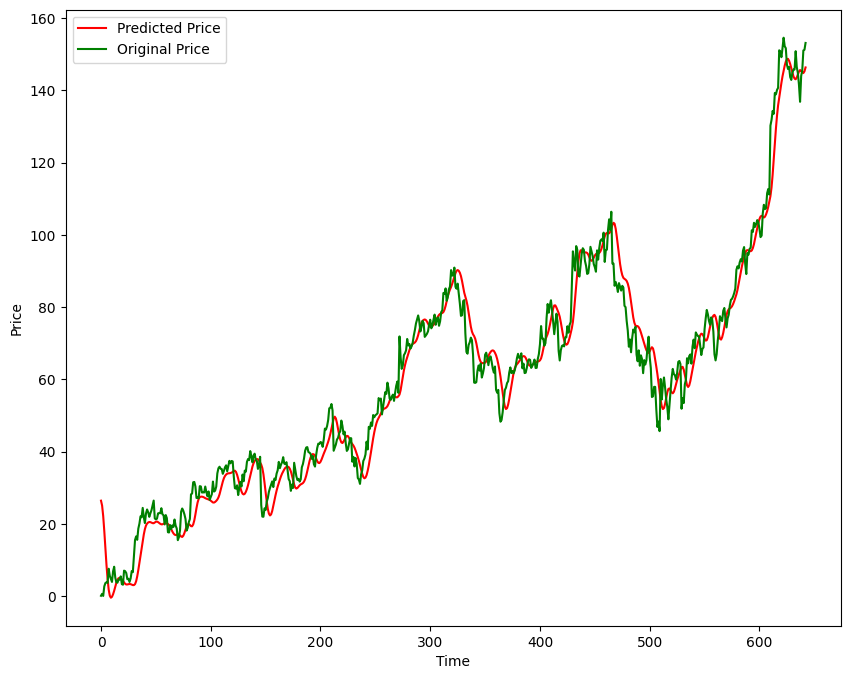

In [121]:
plt.figure(figsize=(10, 8))
plt.plot(y_pred, 'r', label='Predicted Price')
plt.plot(y_test, 'g', label='Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [127]:
model.save('Stock Prediction using LSTM.keras')